In [17]:
import xml.etree.ElementTree as ET
tree = ET.parse("./joly.gpx")

all_altitudes = []

for element in tree.iter():
    if element.tag == '{http://www.topografix.com/GPX/1/1}ele':
        all_altitudes.append(float(element.text))

In [ ]:
len(all)

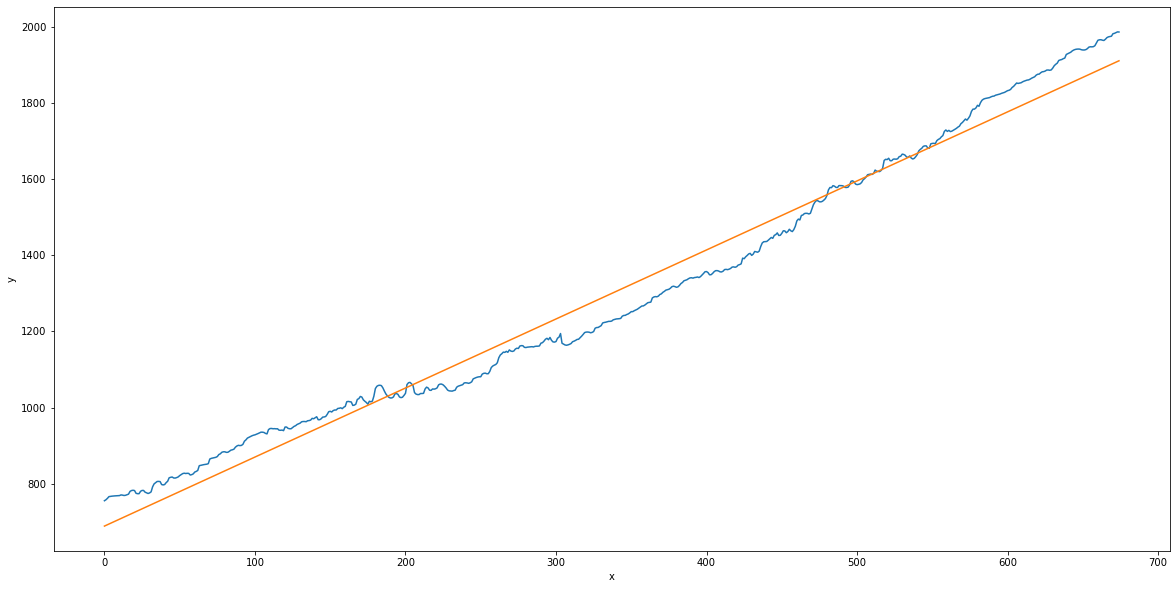

In [26]:
from scipy.signal import argrelextrema
import numpy as np
import matplotlib.pyplot as plt
import pwlf

order = round(len(all_altitudes)/15)

y = np.array(all_altitudes)
x = np.array([i for i,j in enumerate(y)])

model = pwlf.PiecewiseLinFit(x,y)

max_breaks = argrelextrema(y,np.greater,order=order)
min_breaks = argrelextrema(y,np.less,order=order)

breakpoints = np.concatenate((max_breaks,min_breaks),axis=1)
breakpoints = sorted(breakpoints.tolist()[0])

model.fit_with_breaks(breakpoints)
x_hat = np.linspace(x.min(),x.max(),5000)
y_hat = model.predict(x_hat)

plt.figure(figsize=(20,10))
plt.plot(x,y,)
plt.plot(x_hat,y_hat,'-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()